# Workflow

En esta práctica vamos a aplicar lo aprendido en esta asignatura para crear un flujo que automatice la descarga, análisis y publicación de los datos utilizando distintas herramientas como Zenodo, github y librerías de python para el análisis de datos

### Librerías necesarias para la práctica

```python
import xml.etree.ElementTree as ET
import requests
import json
import zipfile
```

### Elementos necesarios
* Al menos un fichero CSV
* Un script de análisis de datos en CSV (Publicado en Github)


# Publicación de datos iniciales

Utilizando Zenodo, de forma manual, publicar los datos que se vayan a utilizar. Pueden ser datos de alguna práctica (tipo tabla), imágenes, etc. Incluir metadatos.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Una vez logueado en Zenodo, en la parte superior, crear una nueva "Community". Utilizar Communities para localizar más facilmente los datos</p>
</div>


In [ ]:
#Data has been sent to the following URL: https://zenodo.org/record/3609002#.Xh81zsZKjEE

# Publicación de script de Análisis

En Github + Zenodo

In [42]:
#The script has now been published in https://github.com/cedricpri/MasterDLC/releases/tag/v1.0

# Descarga de datos

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH + API o DOI + API)

Pista: url+'?verb=ListRecords&set=nombre_set

In [48]:
#My DOI: 10.5281/zenodo.3609002
import xml.etree.ElementTree as ET
import requests
import json
import csv

#Let's search for our data using ListRecords and my community name
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&set=user-datasciencemastercedric&metadataPrefix=datacite')

oaiTree = ET.fromstring(oai.text)
records = oaiTree.findall('.//{http://datacite.org/schema/kernel-4}identifier')

#Only one record should be found, if not, the first will be used
for e in records:
    zenodoId = e.text
    break
    
identifier = zenodoId.split('.')[-1] #We just need the part after the dot
print("Identifier: " + identifier)
r = requests.get("https://zenodo.org/api/records/"+identifier)

#r.text is now a json where we can find the download link
record = json.loads(r.text)
downloadLink = (record['files'][0]['links']['self'])
print("Download link: " + downloadLink)

#Let's download the file
r2 = requests.get(downloadLink)
if r2.status_code == 200:
    print("File downloaded!")
else:
    print("An error "+ str(r2.status_code) + " occured when downloading the file")
    
f = open('FlightsData.csv','w')
f.write(r2.text)
f.close()    

Identifier: 3609002
Download link: https://zenodo.org/api/files/39a7036d-1093-480b-9c3e-7a08a73302c0/UsersData.csv
File downloaded!


# Metadatos

Muestra los metadatos asociados a los objetos digitales

In [61]:
#Let's search for our data using ListRecords and my community name
oai = requests.get('https://zenodo.org/oai2d?verb=ListRecords&set=user-datasciencemastercedric&metadataPrefix=datacite')

oaiTree = ET.fromstring(oai.text)
records = oaiTree.findall('.//')

#Only one record should be found, if not, the first will be used
for e in records:
    print(str(e.tag) + " " + str(e.text))

{http://www.openarchives.org/OAI/2.0/}responseDate 2020-01-16T15:29:14Z
{http://www.openarchives.org/OAI/2.0/}request https://zenodo.org/oai2d
{http://www.openarchives.org/OAI/2.0/}ListRecords 
    
{http://www.openarchives.org/OAI/2.0/}record 
      
{http://www.openarchives.org/OAI/2.0/}header 
        
{http://www.openarchives.org/OAI/2.0/}identifier oai:zenodo.org:3609002
{http://www.openarchives.org/OAI/2.0/}datestamp 2020-01-15T15:54:51Z
{http://www.openarchives.org/OAI/2.0/}setSpec user-datasciencemastercedric
{http://www.openarchives.org/OAI/2.0/}metadata 
        
{http://datacite.org/schema/kernel-4}resource 
          
{http://datacite.org/schema/kernel-4}identifier 10.5281/zenodo.3609002
{http://datacite.org/schema/kernel-4}creators 
            
{http://datacite.org/schema/kernel-4}creator 
              
{http://datacite.org/schema/kernel-4}creatorName Cedric Prieels
{http://datacite.org/schema/kernel-4}affiliation Logmyflight
{http://datacite.org/schema/kernel-4}titles 


# Descarga de código

Desde Zenodo, utilizando los métodos conocidos (OAI-PMH, API)

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>Zenodo guarda un zip con el código</p>
</div>

In [59]:
import requests, zipfile, io, os

r = requests.get("https://zenodo.org/api/deposit/depositions", params={'q': 'MasterDLC', #Search query
                                'access_token': 'l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ'})
if r.status_code == 200:
    record = json.loads(r.text)
    downloadLink = (record[0]['files'][0]['links']['download'])
    print("Download link: " + downloadLink)
    
    #Let's download the file
    r2 = requests.get(downloadLink+"?access_token=l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ")
    if r2.status_code == 200:
        print("Code downloaded!")
        z = zipfile.ZipFile(io.BytesIO(r2.content))
        z.extractall() #To save the zip uncompressed
        os.system('mv cedricpri-MasterDLC*/*.py .')
    else:
        print("An error "+ str(r2.status_code) + " occured when downloading the code")
    
else:
    print("An error "+ str(r2.status_code) + " occured when downloading the code")

Download link: https://zenodo.org/api/files/ebd4d5d1-a91f-4707-affa-6f70a74d2be9/cedricpri/MasterDLC-v1.0.zip
Code downloaded!


# Análisis de los datos

Combinando los datos iniciales, producir un resultado en un fichero nuevo: Otro CSV, imagen, etc

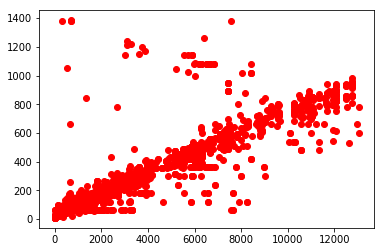

In [63]:
#The python file is saved under cedricpri-MasterDLC-9b418b0/analisis.py
#The dataset is saved under FlightsData.csv

import csv
import numpy as np
import matplotlib.pyplot as plt

%run ./analisis.py

# Publicación de los Datos

Utilizando la API de Zenodo

In [87]:
#Empty upload
headers = {"Content-Type": "application/json"}
r = requests.post('https://zenodo.org/api/deposit/depositions', params={'access_token': 'l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ'}, json={}, headers=headers)

if r.status_code == 201:
    deposition_id = r.json()['id']
    data = {'name': 'FlightsData.csv'}
    files = {'file': open('FlightsData.csv', 'rb')}
    r2 = requests.post('https://zenodo.org/api/deposit/depositions/%s/files' % deposition_id, params={'access_token': 'l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ'}, data=data, files=files)
    print(r2.json())
    
    #Create the metadata
    data = {
         'metadata': {
         'title': 'Zenodo flights data upload',
         'upload_type': 'dataset',
         'description': 'This is my first upload from the REST API of the flights data csv dataset',
         'creators': [{'name': 'Cedric Prieels',
                       'identifier': 'datasciencemastercedric'}]
        }
     }
    
    r3 = requests.put('https://zenodo.org/api/deposit/depositions/%s' % deposition_id, params={'access_token': 'l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ'}, data=json.dumps(data), headers=headers)
    
    #Uncomment these lines to send the script online !
    if r3.status_code == 200 and r2.status_code == 201:
        r4 = requests.post('https://zenodo.org/api/deposit/depositions/%s/actions/publish' % deposition_id, params={'access_token': 'l8kewVK8ZFjDw5mmoNVnHUXLqDuqhfr39FCrekepsZMiLKtKWTf82uzFMAOZ'} )
        if r4.status_code == 202:
            print("Upload success!")
        else:
            print("An error "+ str(r4.status_code) + " occured when uploading the code (3)")
    elif r3.status_code == 400:
            print("An error occured. Maybe you already published the same file?")
    else:
            print("An error "+ str(r3.status_code) + " occured when uploading the code (2)")
    
else:
    print("An error "+ str(r.status_code) + " occured when uploading the code (1)")

{'checksum': '426676441a158b8a4771320f5f9e9625', 'filename': 'FlightsData.csv', 'filesize': 1359853, 'id': '5690f4ba-e635-4b15-8a27-9815fc217602', 'links': {'download': 'https://zenodo.org/api/files/b44f42f3-bcdb-42c7-8dbe-fea3be4ebc59/FlightsData.csv', 'self': 'https://zenodo.org/api/deposit/depositions/3610447/files/5690f4ba-e635-4b15-8a27-9815fc217602'}}
An error occured. Maybe you already published the same file?


¿Puedes replicar ese workflow en un sólo bloque con otros datos?